In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
from IPython.display import display
import numpy as np


pd.options.display.max_columns = None
%matplotlib inline

# 한글 폰트
plt.rcParams['font.family'] = 'NanumGothic'
# 마이너스 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔 고딕의 경로
font_prop = fm.FontProperties(fname=font_path).get_name()

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = font_prop

# 전역 팔레트 설정 (예: 'Set2' 팔레트 사용)
sns.set_palette('Set2')
sns_color = sns.color_palette('pastel')[0:5]

In [116]:
# 데이터 불러오기
regular_season = pd.read_csv('../datas/Regular_Season_Batter.csv')
regular_season_day = pd.read_csv('../datas/Regular_Season_Batter_Day_by_Day_b4.csv')

# 데이터프레임 null 값 확인
display(pd.DataFrame({'regular_season': regular_season.isna().sum(), 'regular_season_day': regular_season_day.isna().sum()}).fillna(''))

'''
앞서 각 데이터의 null 값을 모두 채웠기 때문에 없다.
첫 연봉은 제대로된 정보가 없고, 있더라도 조금씩 달라서 제외했다.
''';

,regular_season,regular_season_day
2B,0.0,0.0
3B,0.0,0.0
AB,0.0,0.0
BB,0.0,0.0
CS,0.0,0.0
E,0.0,
G,0.0,
GDP,0.0,0.0
H,0.0,0.0
HBP,0.0,0.0


'''
입력된 데이터 중에서 잘못 입력된 데이터들이 있다.
그 데이터들을 수정했다.

수정하기 전에 각 컬럼이 어떤 것인지 다시 한 번 확인해 보았다.
''';

| 컬럼 이름         | 뜻                                |컬럼 이름         | 뜻                                |
|--------------------|------------------------------------|--------------------|------------------------------------|
| batter_id         | 타자 ID (고유 식별자)                 |HBP               | 몸에 맞는 공 (Hit by Pitch)           |
| batter_name       | 타자 이름                             |SO                | 삼진 (Strikeouts)                     |
| year              | 시즌 연도                             |GDP               | 병살타 (Grounded Into Double Play)    |
| team              | 소속 팀 이름                          |SLG               | 장타율 (Slugging Percentage, 총 루타 / 타수) |
| avg               | 타율 (Batting Average, 안타 수 / 타수)|OBP               | 출루율 (On-base Percentage, 출루 횟수 / 타석)|
| G                 | 경기 수 (Games Played)                |E                 | 실책 수 (Errors)                      |
| AB                | 타수 (At-Bats)                        |height/weight     | 신장/체중 (Height/Weight)              |
| R                 | 득점 (Runs Scored)                    |year_born         | 출생 연도 (Year Born)                 |
| H                 | 안타 수 (Hits)                        |position          | 포지션 (Position)                     |
| 2B                | 2루타 (Doubles)                       |career            | 경력 (Career, 몇 년 차인지)           |
| 3B                | 3루타 (Triples)                       |starting_salary   | 연봉 (Starting Salary)                |
| HR                | 홈런 수 (Home Runs)                   |OPS               | OPS (출루율 + 장타율, On-base Plus Slugging)            |
| TB                | 루타 수 (Total Bases)                 |pos               | 세부 포지션 (Position Detail, 예: IF, OF 등)            |
| RBI               | 타점 (Runs Batted In)                 |hand              | 타격/투구 손잡이 (Hand, 예: R-우타, L-좌타)            |
| SB                | 도루 (Stolen Bases)                   |country           | 국적 (Country)                        |
| CS                | 도루 실패 (Caught Stealing)           |
| BB                | 볼넷 (Base on Balls)                  |


In [117]:
'''
먼저 기존에 잘못 계산했기 때문에 잘못된 값이 들어가 있다.
그래서 값을 먼저 처음 값으로 되돌리고 진행한다.
'''
regular_season['SLG'] = pd.read_csv('../datas/62540_KBO_prediction_data/Regular_Season_Batter.csv', encoding='utf-8')['SLG']
regular_season['OBP'] = pd.read_csv('../datas/62540_KBO_prediction_data/Regular_Season_Batter.csv', encoding='utf-8')['OBP']

In [ ]:
# 장타율 계산
# 안타는 1개 이상 있지만, 장타율이 0인 경우
display(regular_season[(regular_season['SLG'] == 0) & (regular_season['H'] > 0)].iloc[:, :22].head(3))
'''
SLG = (단타 + 2루타 *2 + 3루타 * 3 + 홈런 * 4) / 타수
SLG = H + (2B * 2) + (3B * 3) + (HR * 4) / AB
''';

# 장타율 계산
regular_season['SLG'] = regular_season.apply(lambda x: round(sum([x['H'], x['2B'] * 2, x['3B'] * 3, x['HR'] * 4]) / x['AB'], 3) if x['AB'] != 0 else 0, axis=1)

# 기존의 SLG과 새로 계산한 SLG
pd.concat(
    [regular_season[['H', '2B', '3B', 'HR', 'AB']].map(int),
     pd.read_csv('../datas/62540_KBO_prediction_data/Regular_Season_Batter.csv', encoding='utf-8')['SLG'].reset_index(drop=True),  # 기존 SLG
     regular_season['SLG'].reset_index(drop=True)],  # 새로 계산한 SLG
    axis=1  # 열 방향으로 병합
)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP
478,62,김주찬,2000,삼성,0.313,60,48,22,15,3,2,0,22,5,7,2,3,1,16,0,0.0,0.0
746,109,박기혁,2000,롯데,0.333,5,3,1,1,0,0,0,1,1,0,0,0,0,2,0,0.0,0.0
1457,207,이범호,2000,한화,0.162,69,74,11,12,7,0,1,22,3,1,0,10,1,21,2,0.0,0.0


,H,2B,3B,HR,AB,SLG,SLG
0,62,9,0,8,183,0.519,0.612
1,0,0,0,0,1,0.000,0.000
2,19,2,3,1,86,0.349,0.419
3,80,7,4,2,311,0.325,0.367
4,16,3,2,1,101,0.257,0.317
...,...,...,...,...,...,...,...
2449,0,0,0,0,5,0.000,0.000
2450,0,0,0,0,2,0.000,0.000
2451,0,0,0,0,10,0.000,0.000
2452,34,6,2,1,117,0.402,0.479


In [119]:
# display(regular_season.head(2))
# OBP(출루율)
'''
OBP = (안타+볼넷+몸에 맞은 공)÷(타수+볼넷+몸에 맞은 공+희생플라이)
OBP = (H + BB + HBP) / (AB + BB + HBP + "") 이 데이터에는 희생플라이 컬럼이 없다.

그래서 문제가 있는 행은 제거한다.
'''

# 출루율이 잘못 입력되어있는 부분
drop_index = regular_season.loc[
    # 안타, 볼넷, 사구의 합이 0 이상인데 출루율이 0인 경우
    (sum([regular_season['H'] > 0, regular_season['BB'] > 0, regular_season['HBP']]) > 0) & (regular_season['OBP'] == 0) |
    # 타수, 볼넷, 사구의 합이 0 이상인데 출루율이 0인 경우
    (sum([regular_season['AB'] > 0, regular_season['BB'] > 0, regular_season['HBP']]) > 0) & (regular_season['OBP'] == 0)
    ].index

regular_season = regular_season.drop(drop_index).reset_index(drop=True)
regular_season.head(2)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,pos,hand,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.612,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,내야수,우타,외국인
1,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.419,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,내야수,좌타,한국인


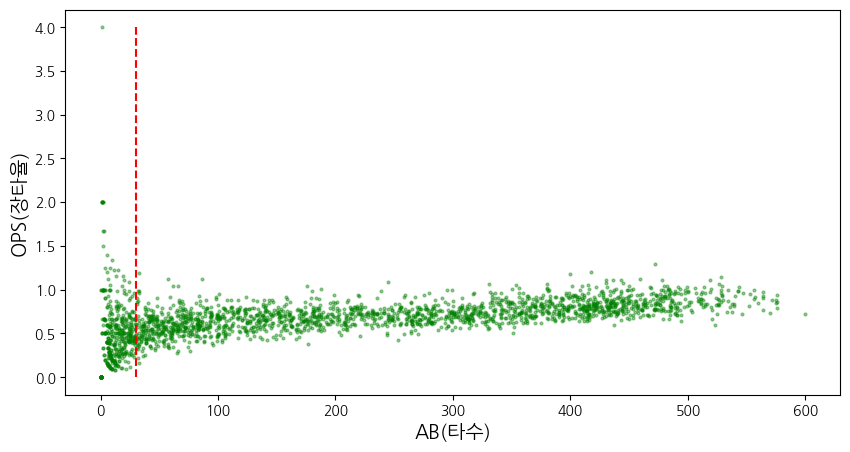

In [120]:
# 규정타수 대비 OPS 시각화

plt.figure(figsize=(10, 5))
plt.plot('AB', 'OPS', data=regular_season, marker='o', linestyle='none', markersize=2, color='green', alpha=0.4)
plt.xlabel('AB(타수)', fontsize=14)
plt.ylabel('OPS(장타율)', fontsize=14)
# 규정 타수 30부터 OPS의 분포가 넓어졌기 때문에 30을 규정 타수로 정의하고 진행
plt.vlines(30, ymin=min(regular_season['OPS']), ymax=max(regular_season['OPS']), linestyles='dashed', colors='red')
plt.show()

In [128]:
# OPS 이상치 탐색을 위한 수치 정의
Q1 = regular_season['OPS'].quantile(0.25)
Q3 = regular_season['OPS'].quantile(0.75)
IQR = Q3 - Q1

# print(f'{Q1 - 1.5 * IQR} < value < {Q3 + 1.5 * IQR}')

# 이상치 탐색
regular_season.loc[
    (regular_season['OPS'] < (Q1 - 1.5 * IQR))|
    (regular_season['OPS'] > (Q3 + 1.5 * IQR))
].sort_values(by=['AB'], axis=0, ascending=False)[['batter_name', 'AB', 'year', 'OPS']].head(10)

,batter_name,AB,year,OPS
748,박병호,528,2015,1.150000
2212,테임즈,472,2015,1.293656
87,강정호,418,2014,1.200156
749,박병호,400,2018,1.175000
1253,유재신,33,2018,1.192000
2234,한승택,33,2013,0.165000
2046,채상병,32,2002,0.215909
391,김원섭,25,2005,0.116923
573,나주환,23,2013,0.174000
1469,이여상,22,2013,0.090909


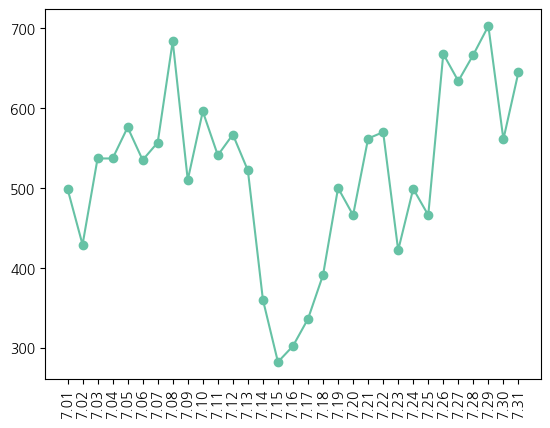

In [131]:
major_ticks = list(np.round(np.linspace(7.01, 7.31, 31), 2))

july = (regular_season_day['date'] >= 7) & (regular_season_day['date'] < 8)
plt.plot(major_ticks, regular_season_day['date'].loc[july].value_counts().sort_index(), marker='o')
plt.xticks(major_ticks, rotation=90)
plt.show()